# Nairobi AirBnb Listing Data Analysis 🏠
**Data Period:** October 1, 2024 – September 29, 2025
 
This project analyzes Nairobi’s Airbnb and vacation rental market using property listings and calendar rates data to uncover trends and patterns in the city’s short-term rental landscape.

#### Listings Data 📃
>  The [**Listings Data**](https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/listings_raw_data.csv) includes detailed information on a sample of 300 listings in Nairobi, Kenya, covering property attributes, ratings across multiple categories, and performance metrics for the trailing twelve months.

##### *Objectives:*
1. Examine the distribution, trends, and patterns of Airbnb listings in Nairobi.

2. Evaluate the investment potential of the market, focusing on returns and revenue.

#### Past Calendar Rates Data 🗓️
> The [**Past Calendar Rates Data**](https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/past_calendar_rates_raw_data.csv) contains information on occupancy rates, revenue metrics, average daily rates, booking lead times, and minimum night requirements.


##### *Objectives:*
- Identify demand patterns, pricing trends, and occupancy rates across different periods of the year. 

**Data Source:** [AirROI.com](https://www.airroi.com/data-portal/markets/nairobi-kenya)

In [1]:
# import libraries and load data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.impute import SimpleImputer # to impute missing values

# for geographical plotting
import folium

import warnings
warnings.filterwarnings('ignore')

**Load the Datasets**

In [ ]:
# load listings data with information about properties listed
df_listings = pd.read_csv(r'https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/listings_raw_data.csv')

# load calendar data with information on occupancy of the Airbnbs
df_calendar =pd.read_csv(r'https://github.com/Morris-mk/Nairobi_AirbnbMarket_Overview_and-_InvestmentAnalysis/raw/refs/heads/main/data/past_calendar_rates_raw_data.csv')

In [3]:
print(df_listings.shape)
df_listings.head()

(300, 62)


,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,75683,Kiloranhouse Apt Prime Bedroom,Private room in home,private_room,https://a0.muscache.com/im/pictures/5499026/ef...,13,26997,Adriel,NaN,NaN,...,0.011,0.000,0.5,58.9,0.0,0.0,1,0,89,90
1,471581,Located In a Serene Environment,Entire cottage,entire_home,https://a0.muscache.com/im/pictures/6434524/bc...,37,2280941,Bella,NaN,NaN,...,0.422,0.613,17.6,2278.3,25.6,3307.3,38,28,52,90
2,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/68ecc57f-d...,29,4856316,Chichi,NaN,NaN,...,0.233,0.000,12.2,1576.3,0.0,0.0,21,0,69,90
3,1023556,Guesthouse Near Nairobi National Park & Airport,Entire guesthouse,entire_home,https://a0.muscache.com/im/pictures/ddd8badc-1...,20,5634522,Janet,NaN,NaN,...,0.033,0.000,0.6,83.3,0.0,0.0,3,0,87,90
4,1237886,Hob House,Room in bed and breakfast,hotel_room,https://a0.muscache.com/im/pictures/cbdab7e1-f...,8,6748840,NaN,NaN,NaN,...,0.056,0.000,7.0,910.2,0.0,0.0,5,0,85,90


In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   300 non-null    int64  
 1   listing_name                 300 non-null    object 
 2   listing_type                 300 non-null    object 
 3   room_type                    300 non-null    object 
 4   cover_photo_url              300 non-null    object 
 5   photos_count                 300 non-null    int64  
 6   host_id                      300 non-null    int64  
 7   host_name                    298 non-null    object 
 8   cohost_ids                   100 non-null    object 
 9   cohost_names                 100 non-null    object 
 10  superhost                    300 non-null    bool   
 11  latitude                     300 non-null    float64
 12  longitude                    300 non-null    float64
 13  guests              

In [4]:
print(df_calendar.shape)
df_calendar.head()

(3552, 14)


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,36253079,2024-10-01,31,0,0.000,0.0,32.1,NaN,NaN,NaN,NaN,NaN,4141.0,0.0
1,36253079,2024-11-01,30,0,0.000,0.0,30.8,NaN,NaN,NaN,NaN,NaN,3973.0,0.0
2,36253079,2024-12-01,18,13,0.419,408.0,31.3,31.4,1.0,28.0,NaN,4066.0,4054.0,52839.0
3,36253079,2025-01-01,16,15,0.484,472.0,31.5,31.5,NaN,NaN,1.0,4069.0,4069.0,60968.0
4,36253079,2025-02-01,28,0,0.000,0.0,30.2,NaN,NaN,NaN,1.0,NaN,3901.0,0.0


In [7]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3552 non-null   int64  
 1   date                    3552 non-null   object 
 2   vacant_days             3552 non-null   int64  
 3   reserved_days           3552 non-null   int64  
 4   occupancy               3552 non-null   float64
 5   revenue                 3552 non-null   float64
 6   rate_avg                3552 non-null   float64
 7   booked_rate_avg         1868 non-null   float64
 8   booking_lead_time_avg   1662 non-null   float64
 9   length_of_stay_avg      1662 non-null   float64
 10  min_nights_avg          2691 non-null   float64
 11  native_booked_rate_avg  1868 non-null   float64
 12  native_rate_avg         3552 non-null   float64
 13  native_revenue          3552 non-null   float64
dtypes: float64(10), int64(3), object(1)
memo

***

## Listings Data Analysis

**Data Cleaning & Wrangling for df_listings**
- remove duplicates
- harmonize data type inconsistencies
- remove unnecesary features
- deal with null values
- outliers

In [6]:
# create a copy of the data
df_listings_copy = df_listings.copy()

# remove duplicates
df_listings.drop_duplicates()
print('duplicates removed')

# missing values in percentage
((df_listings.isna().sum()/ len(df_listings))*100).round(2)

duplicates removed


listing_id                     0.0
listing_name                   0.0
listing_type                   0.0
room_type                      0.0
cover_photo_url                0.0
                              ... 
l90d_adjusted_revpar_native    0.0
l90d_reserved_days             0.0
l90d_blocked_days              0.0
l90d_available_days            0.0
l90d_total_days                0.0
Length: 62, dtype: float64

In [7]:
# remove columns that have missing values exceeding 50% threhold
thresh = int( 0.5 * len(df_listings))
df_listings.dropna(thresh=thresh, axis=1, inplace=True)

print(f'original dataframe shape = {df_listings_copy.shape},\nnew dataframe shape = {df_listings.shape}')
print('------------------------------')
print('=> features with extreme null_values removed')

original dataframe shape = (300, 62),
new dataframe shape = (300, 60)
------------------------------
=> features with extreme null_values removed


In [8]:
# feature selection and manipulation in df_listings
    # calculate average exchange_rate to use during currency conversion
rate = (df_listings.ttm_avg_rate_native / df_listings.ttm_avg_rate).mean()

    # convert cleaning_fee and extra_guest_fee from USD to KSH using the average exchange rate
df_listings.loc[:, 'cleaning_fee'] = round(df_listings['cleaning_fee'] * rate, 2)
df_listings.loc[:, 'extra_guest_fee'] = round(df_listings['extra_guest_fee'] * rate, 2)

    # drop some irrelevant columns, columns in USD currency and the extra ratings features
df_listings.drop(columns = ['cover_photo_url' ,'registration','rating_accuracy', 'rating_checkin','rating_cleanliness','rating_communication',
                            'rating_location','rating_value','ttm_revenue', 'ttm_avg_rate','ttm_revpar', 'ttm_adjusted_revpar', 'l90d_revenue', 
                           'l90d_avg_rate', 'ttm_total_days', 'l90d_total_days','l90d_revpar', 'l90d_adjusted_revpar','currency' ], inplace=True)

    # Check remaining missing values
df_listings.shape

(300, 41)

In [10]:
# rename some cols for easier referrencing 
df_listings.rename(columns= {'num_reviews':'total_reviews','ttm_revenue_native':'total_ttm_revenue', 'ttm_avg_rate_native': 'daily_avg_ttm_rate',
                             'ttm_revpar_native':'ttm_revpar', 'ttm_adjusted_revpar_native':'ttm_adjusted_revpar', 'l90d_revenue_native':'l90d_revenue',
                             'l90d_avg_rate_native':'l90d_avg_rate','l90d_revpar_native':'l90d_revpar', 'l90d_adjusted_revpar_native':'l90d_adjusted_revpar',
                             }, inplace=True)

In [11]:
# missing values in percentage
((df_listings.isna().sum()/ len(df_listings))*100).round(2)

listing_id                  0.00
listing_name                0.00
listing_type                0.00
room_type                   0.00
photos_count                0.00
host_id                     0.00
host_name                   0.67
superhost                   0.00
latitude                    0.00
longitude                   0.00
guests                     14.33
bedrooms                   17.33
beds                        0.67
baths                       0.00
amenities                   0.00
instant_book                6.67
professional_management    42.00
min_nights                  0.67
cancellation_policy         0.00
cleaning_fee                0.33
extra_guest_fee             6.33
total_reviews               0.00
rating_overall              3.67
total_ttm_revenue           0.00
daily_avg_ttm_rate          0.00
ttm_occupancy               0.00
ttm_adjusted_occupancy      0.00
ttm_revpar                  0.00
ttm_adjusted_revpar         0.00
ttm_reserved_days           0.00
ttm_blocke

- For the columns with continous data(rating_overall,extra_guest_fee ) we'll use the mean to impute for missing values
- for columns with discrete data we'll use the majority class 
- for the host_name column we'll replace null values with a place holder

In [12]:
# select features with missing values 
discrete_cols = ['guests', 'bedrooms', 'beds', 'baths', 'instant_book', 'professional_management', 'min_nights']
continous_cols = ['cleaning_fee', 'extra_guest_fee', 'rating_overall']

# import imputer class and fill in missing values 
imputer_d = SimpleImputer(strategy="most_frequent", copy=False) # discrete features
imputer_c = SimpleImputer(strategy="mean", copy=False) #for continous features

df_listings[discrete_cols] = imputer_d.fit_transform(df_listings[discrete_cols])
df_listings[continous_cols] = imputer_c.fit_transform(df_listings[continous_cols])

# fill in missing value in 'host_name' feature with 'missing' as the place_holder
df_listings.host_name.fillna('missing', inplace=True)


In [13]:
# confirm there are no missing values 
df_listings.isna().sum()

listing_id                 0
listing_name               0
listing_type               0
room_type                  0
photos_count               0
host_id                    0
host_name                  0
superhost                  0
latitude                   0
longitude                  0
guests                     0
bedrooms                   0
beds                       0
baths                      0
amenities                  0
instant_book               0
professional_management    0
min_nights                 0
cancellation_policy        0
cleaning_fee               0
extra_guest_fee            0
total_reviews              0
rating_overall             0
total_ttm_revenue          0
daily_avg_ttm_rate         0
ttm_occupancy              0
ttm_adjusted_occupancy     0
ttm_revpar                 0
ttm_adjusted_revpar        0
ttm_reserved_days          0
ttm_blocked_days           0
ttm_available_days         0
l90d_revenue               0
l90d_avg_rate              0
l90d_occupancy

In [ ]:
# Outliers 

### EDA for df_listings

**Objective 1:** Understanding the distribution, trends and patterns of listings within Nairobi

> Lead Questions
- [ ] How are Airbnb listings distributed geographically across Nairobi?
- [ ] What types of listings (e.g., room_type, listing_type) are most common in Nairobi, and how do their characteristics vary?
- [❌] What amenities are most commonly offered, and do they correlate with higher ratings or occupancy?
- [ ] How do host characteristics (e.g., superhost status, professional management) influence listing performance?


**Objective 2:** Analyze the Investment Potential of the Market in Terms of Returns and Revenue
- [ ] What is the revenue potential of Airbnb listings in Nairobi, and how does it vary by property type or location?
- [ ] What are the key drivers of higher revenue per available room (RevPAR) in Nairobi’s Airbnb market?
- [ ] How do pricing strategies (e.g., daily rates, cleaning fees, extra guest fees) impact occupancy and revenue?
- [ ] What is the return on investment (ROI) potential for new Airbnb listings in Nairobi?



**Summary statistics**
> To understand the data characteristics 

In [14]:
# identify the number unique samples in each feature
df_listings.nunique()

# define columns to exclude
no = ['listing_id', 'host_id','latitude', 'longitude']

# summary stats for numerical features
num_cols = [col for col in df_listings.select_dtypes(exclude= ['object','bool']) if col not in no ]
df_listings[num_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
photos_count,300.0,30.44,16.05,0.00,19.00,29.00,37.00,122.00
cleaning_fee,300.0,1169.83,2734.34,0.00,0.00,0.00,1292.13,33595.34
extra_guest_fee,300.0,460.75,1387.71,0.00,0.00,0.00,460.75,12921.29
total_reviews,300.0,59.01,74.17,1.00,18.00,39.00,77.00,692.00
rating_overall,300.0,4.78,0.17,4.17,4.70,4.80,4.90,5.00
total_ttm_revenue,300.0,536551.15,905590.39,17745.00,125538.00,278381.50,633396.50,11802110.00
daily_avg_ttm_rate,300.0,7131.94,6660.59,1292.80,4105.28,5892.15,8381.17,88606.50
ttm_occupancy,300.0,0.20,0.18,0.03,0.06,0.14,0.28,0.90
ttm_adjusted_occupancy,300.0,0.17,0.20,0.00,0.00,0.09,0.29,0.87
ttm_revpar,300.0,1470.00,2481.07,48.60,343.98,762.70,1735.35,32334.50


In [15]:
# summary stats for categorical columns
extra = ['guests', 'bedrooms', 'beds', 'baths', 'instant_book', 'professional_management', 'min_nights']
cat_cols = [col for col in df_listings.select_dtypes(['object','bool']) if col not in no]
cols = extra + cat_cols

df_listings[cols].describe().T

,count,unique,top,freq
guests,300.0,11.0,2.0,165.0
bedrooms,300.0,9.0,1.0,162.0
beds,300.0,12.0,1.0,143.0
baths,300.0,12.0,1.0,117.0
instant_book,300,2,True,165
professional_management,300,1,False,300
min_nights,300.0,9.0,1.0,152.0
listing_name,300,298,Bonsai Villa - Standard King Room,2
listing_type,300,29,Entire rental unit,129
room_type,300,3,entire_home,251


**insights from the summary statistics**

- most of the listed room type is entire home

- the **average occupancy rate** for a listing within Nairobi is *20%*, this means that out of 365 days in a year, a listing is reserved for 73 days.

- The revenue per room in a year is about 1,470.0 Ksh

- *50%* of the listings **don't charge** for an *extra guest*. 25% of those that charge extra for a guest, the amount charged is 460.75Ksh and below

- The average daily cost  for booking in Nairobi ranges is 7131.94Ksh 
    - The rates range from *1,292.8 Ksh as the lowest* to *88,606.5 Ksh* as the *highest rate*. 
    - Note that 50% of the the listed Airbnbs cost 5,892.15Ksh and below 
    - 75% of the listings cost 8,381.17 Ksh and below

- The **average yearly revenue** for a listing is **53,6551.15 Ksh**. 
    - The listing that generated the *minimum* amount of revenue had **17,745.0 ksh** and the *maximum* amount generated was **11,802,110.0 Ksh**. 
    - 50% of the listings generate a revenue of 278,381.5 Ksh and below per year
    - this shows that revenue distribution across the listings is skewed due to outliers, to get a clearer picture of the revenue distribution we'll remove those outliers

**How are Airbnb listings distributed geographically across Nairobi?**

In [ ]:
folium??

In [ ]:
# define the map object for Nairobi
latitude = -1.286389
longitude = 36.817222
nairobi_map = folium.Map(location=[latitude, longitude], tiles='CartoDB Dark Matter')

In [ ]:
# add the markers to identify the location of the listings and add pop up labels to show the ttm_revenue
listings = folium.map.FeatureGroup()

for lat, lng in zip(df_listings.latitude, df_listings.longitude):
    listings.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
# add pop ups 
latitudes = list(df_listings.latitude)
longitudes = list(df_listings.longitude)
labels = list(df_listings.total_ttm_revenue)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], tooltip=label).add_to(nairobi_map)

# add listings to map
nairobi_map.add_child(listings)

**What types of listings (e.g., room_type, listing_type) are most common in Nairobi, and how do their characteristics vary?**

In [18]:
# distribution of listing_type across the listings
df_listings.listing_type.value_counts(normalize=True, ascending=False).round(3).to_frame()*100

,proportion
listing_type,
Entire rental unit,43.0
Entire serviced apartment,9.3
Entire condo,9.0
Private room in rental unit,6.3
Entire guesthouse,6.3
Entire home,6.0
Private room in bed and breakfast,2.7
Entire guest suite,2.0
Entire cottage,1.7


              proportion
room_type               
entire_home    83.666667
private_room   16.000000
hotel_room      0.333333


<Axes: xlabel='room_type', ylabel='percent'>

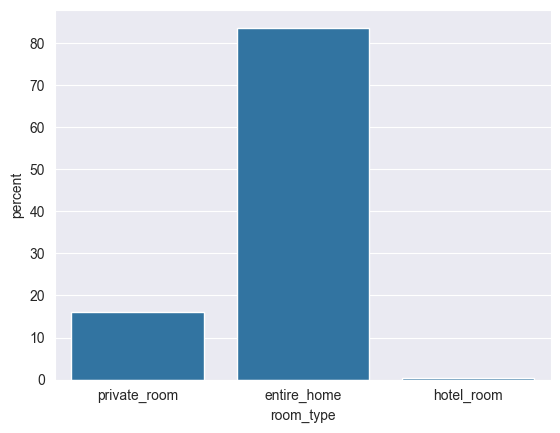

In [ ]:
# determine the proportions of room type
print(df_listings.room_type.value_counts(normalize=True).to_frame()*100)

# countplot showing the proportion of room type
sns.countplot(data=df_listings, x='room_type', stat='percent')

**Categorical columns**

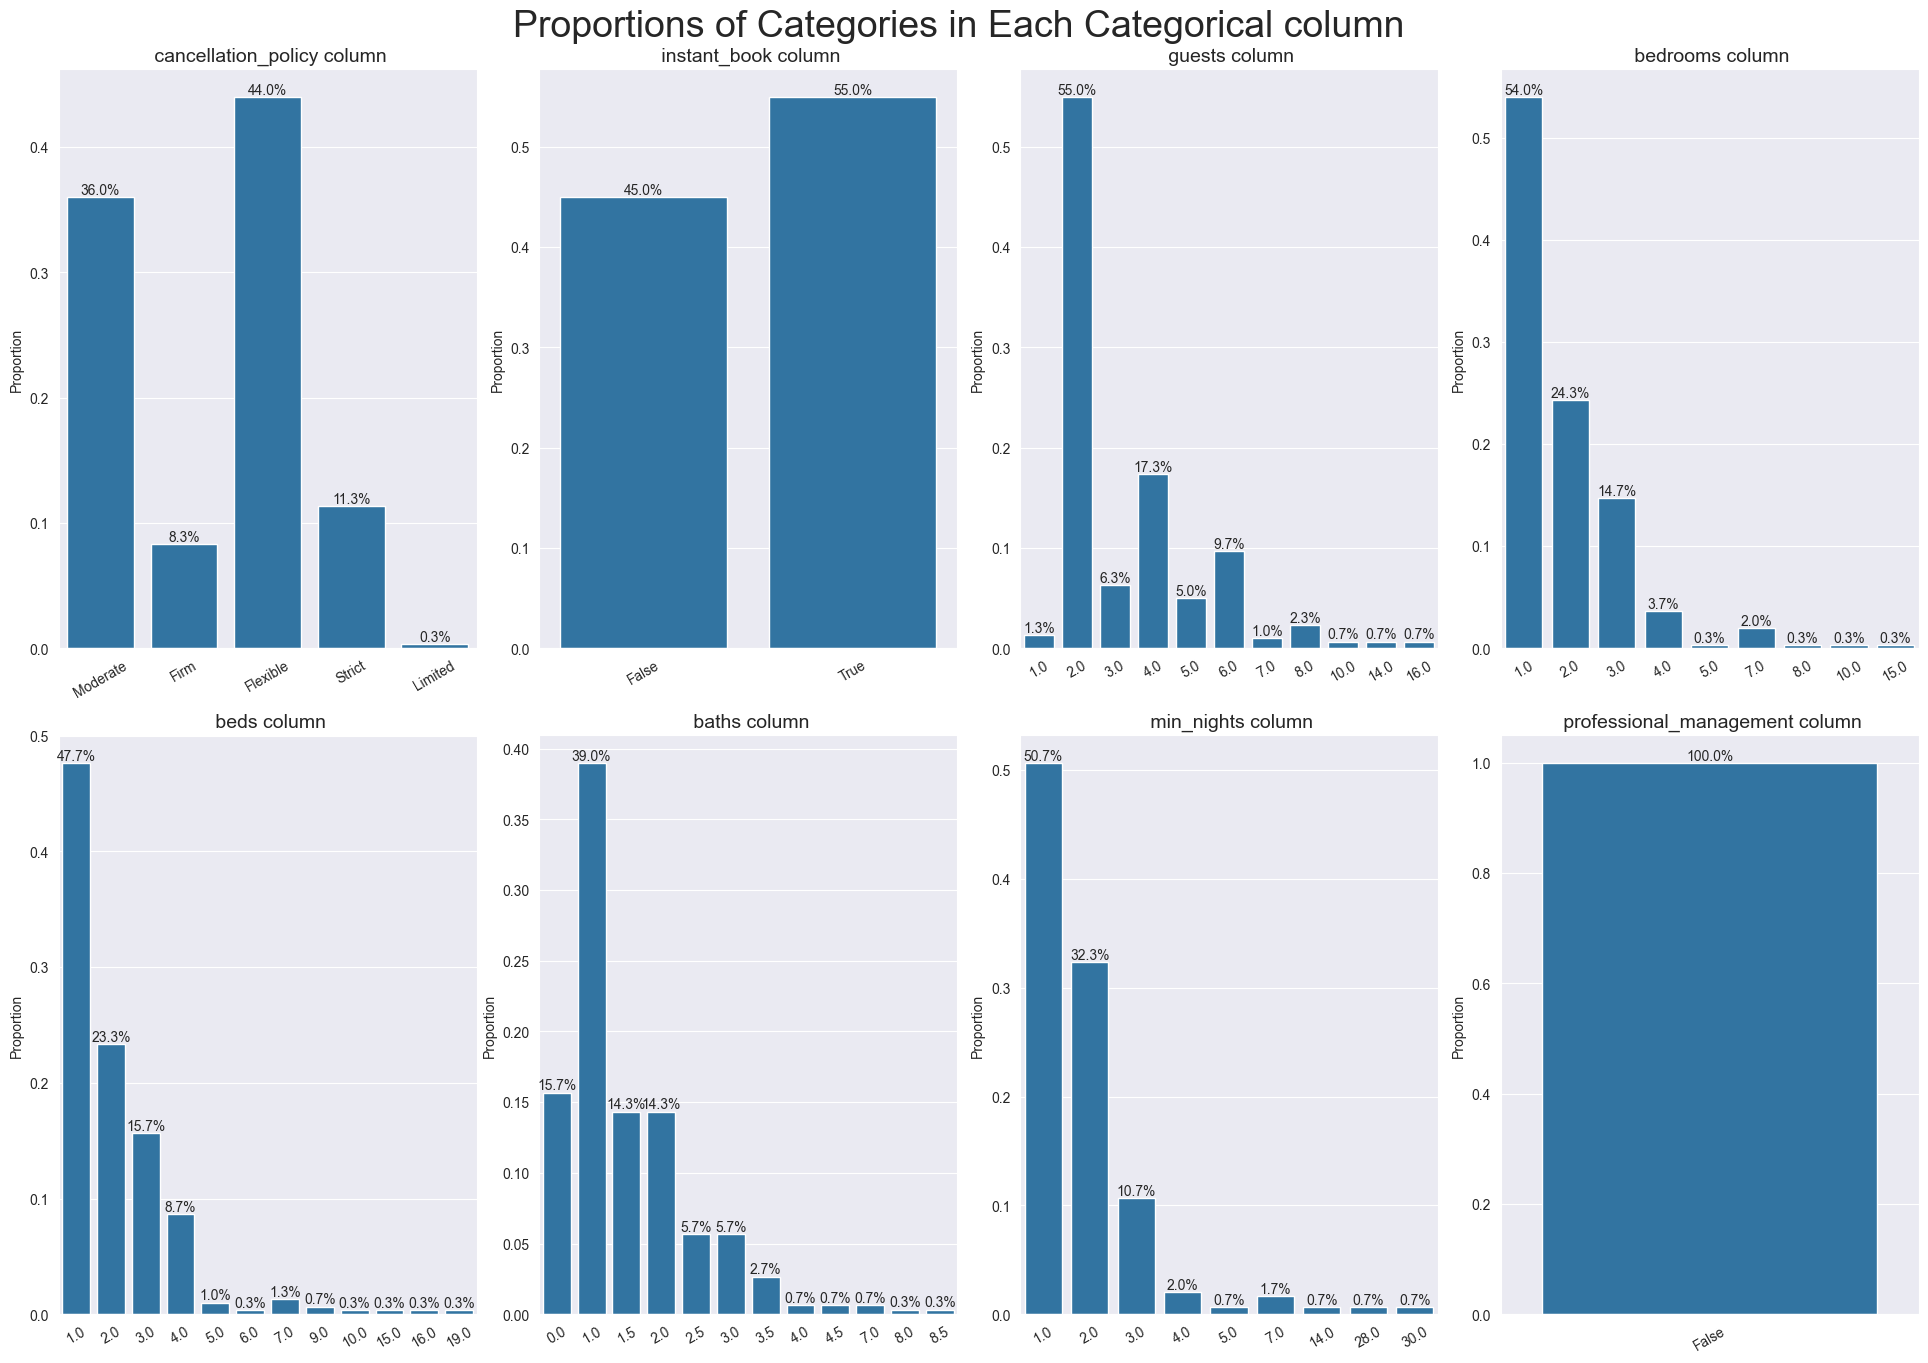

In [20]:
# Select categorical features
cat_cols = ['cancellation_policy', 'instant_book', 'guests','bedrooms', 'beds', 'baths', 'min_nights','professional_management']

def categorical_variable_distribution(cat_cols):  
    # Define the figure canvas
    fig, axs = plt.subplots(2, 4, figsize=(24, 15))
    plt.subplots_adjust(hspace=0.15, wspace=0.15, top=0.94)
    axs = axs.flatten()

    # Loop through categorical columns and plot
    for index, col in enumerate(cat_cols):
        sns.countplot(data=df_listings, x=col, ax=axs[index], stat='proportion')

        # labels
        axs[index].set_xlabel(None)
        axs[index].set_title(f' {col} column', fontsize=14)
        axs[index].set_ylabel("Proportion")
        axs[index].tick_params(axis='x', rotation=30)

        # Annotate each bar in the current axis
        for p in axs[index].patches:
            prop = p.get_height()
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            label = f'{prop:.1%}'  
            axs[index].annotate(label, (x, y), ha='center', va='bottom', fontsize=10)
    # name the visualization
    plt.suptitle('Proportions of Categories in Each Categorical column', fontsize=27)
    plt.show()

# plot the 
categorical_variable_distribution(cat_cols)

**How do host characteristics (superhost status, cancelation policies) influence listing performance?**
- measured on ratings and occupancy rates 


In [38]:
# determine how superhost status affects listing's occupancy and rating
print(df_listings.groupby('superhost')['rating_overall'].mean().to_frame())
print('-----------+++++++++++++')
print(df_listings.groupby('superhost')['ttm_occupancy'].mean().to_frame())


           rating_overall
superhost                
False            4.738945
True             4.849815
-----------+++++++++++++
           ttm_occupancy
superhost               
False           0.153693
True            0.291935


In [37]:
# determine how cancellation policy affects listing rating and occupancy rates 
print(df_listings.groupby('cancellation_policy')['rating_overall'].mean().to_frame().sort_values(by='rating_overall',ascending=False))
print('------------------++++++++++++++++++++++')
print(df_listings.groupby('cancellation_policy')['ttm_occupancy'].mean().to_frame().sort_values(by='ttm_occupancy',ascending=False))

                     rating_overall
cancellation_policy                
Limited                    4.930000
Moderate                   4.802643
Firm                       4.783109
Flexible                   4.771405
Strict                     4.724672
------------------++++++++++++++++++++++
                     ttm_occupancy
cancellation_policy               
Limited                   0.553000
Strict                    0.221382
Firm                      0.214000
Moderate                  0.205704
Flexible                  0.192364


In [ ]:
# impact of instant_book  on occupancy_rates 
print(df_listings.groupby('instant_book')['ttm_occupancy'].mean().to_frame())

              ttm_occupancy
instant_book               
False              0.202652
True               0.204121


*Insights*


### Correlation Analysis

In [ ]:
non_cols = ['listing_id', 'host_id', 'latitude', 'longitude', 'superhost']
cor_cols = [c for c in df_listings.select_dtypes(exclude='object') if c not in non_cols]
correlation = df_listings[cor_cols].corr(method='spearman').round(2) # use spearman to capture 
correlation

**Objective 2:** Analyze the Investment Potential of the Market in Terms of Returns, Revenue  and occupancy

key factors influencing revenue, 
- perfomance is measured by revenue and occupancy
- whats the distribution of income and occupancy rates across roomtypes (boxplots showing income, occupancy distribution per room_type)
- How do pricing strategies (e.g., daily rates, cleaning fees, extra guest fees) impact occupancy and revenue?

In [ ]:
# Correlation heatmap for revenue
plt.figure(figsize=(6,5))
sns.heatmap(correlation.total_ttm_revenue.sort_values(ascending=False).to_frame(), annot=True,cmap='coolwarm')

In [ ]:
# distribution of revenue and revpar per room_type
sns.boxplot(data=df_listings, x='room_type', y='total_ttm_revenue')
sns.boxplot(data=df_listings, x='room_type', y='Revpar')

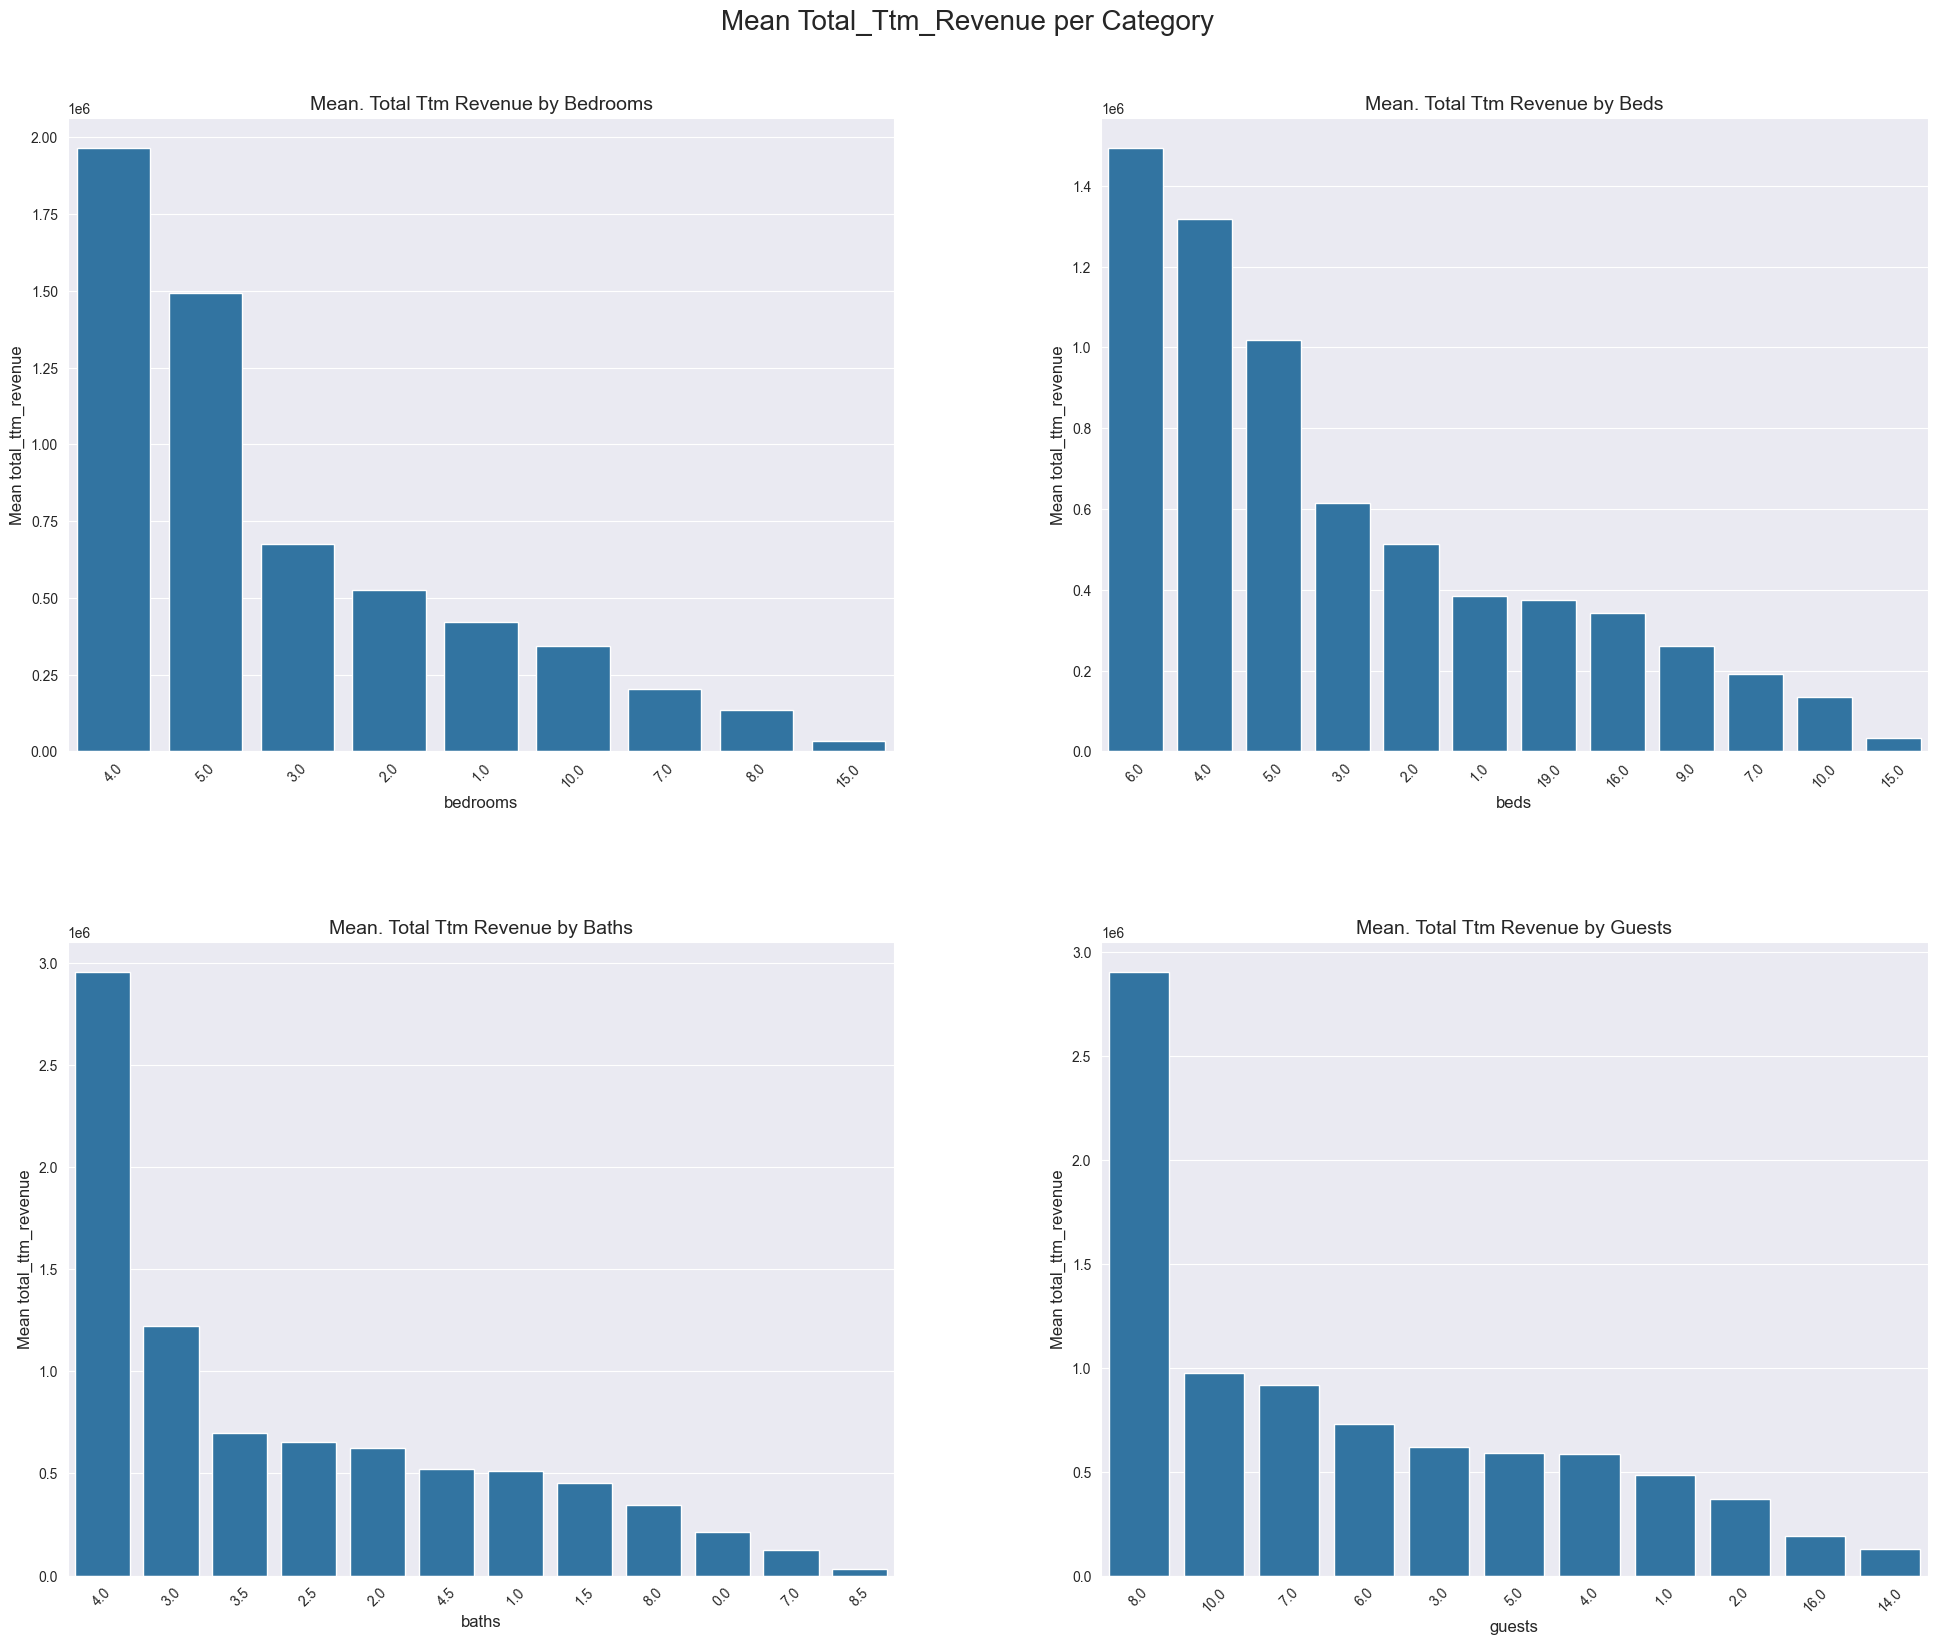

In [172]:
cat_cols = ['bedrooms', 'beds', 'baths', 'guests']

# define function to calculate the average of 
def aggregate_categories(df_listings, cat_cols, agg_col):
    # define figure canvas
    fig, axs = plt.subplots(2, 2, figsize= (24, 18))
    plt.subplots_adjust(hspace=0.3, wspace=0.25, top=0.92)
    axs = axs.flatten()

    # loop through the categorical cols and calculate the average revenue for each category
    for i, col in enumerate(cat_cols):
        plot_data = df_listings.groupby(col)[agg_col].mean().sort_values(ascending=False).round(2).reset_index()

        sns.barplot(data = plot_data,
                    x = col,
                    y = agg_col,
                    ax= axs[i],
                    order=plot_data[col]
                    )
        axs[i].set_title(f'Mean. {agg_col.replace("_", " ").title()} by {col.title()}', fontsize=14)
        axs[i].set_xlabel(col, fontsize=12)
        axs[i].set_ylabel(f'Mean {agg_col}', fontsize=12)

        # Rotate x-labels for better readability
        if len(plot_data) > 5:
            axs[i].tick_params(axis='x', labelrotation=45)

    plt.suptitle(f'Mean {agg_col.title()} per Category', fontsize=20)
    plt.show()

agg_col = 'total_ttm_revenue'
aggregate_categories(df_listings, cat_cols, agg_col)

In [ ]:
# Correlation heatmap for occupancy_rates 
correlation.ttm_occupancy.sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.heatmap(correlation.ttm_occupancy.sort_values(ascending=False).to_frame(), annot=True,cmap='coolwarm')

**What is the return on investment (ROI) potential for new Airbnb listings in Nairobi?**

***

# Analysing the Calendar rates 

In [ ]:
# create a copy of the dataframe
df_calendar_copy = df_calendar.copy()

# remove duplicates in df_calendar
df_calendar.drop_duplicates()
print('duplicates removed')

# convert date column to datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')
print(df_calendar.date.dtypes)

# extract day of the week and month from the date column
df_calendar['month'] = df_calendar['date'].dt.month

# join the room_type from the df_listings  
df_calendar = df_calendar.merge(right=df_listings.room_type, left_on='listing_id',right_on=df_listings.listing_id)

df_calendar.head()

duplicates removed
datetime64[ns]


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue,month,room_type
0,36253079,2024-10-01,31,0,0.000,0.0,32.1,NaN,NaN,NaN,NaN,NaN,4141.0,0.0,10,entire_home
1,36253079,2024-11-01,30,0,0.000,0.0,30.8,NaN,NaN,NaN,NaN,NaN,3973.0,0.0,11,entire_home
2,36253079,2024-12-01,18,13,0.419,408.0,31.3,31.4,1.0,28.0,NaN,4066.0,4054.0,52839.0,12,entire_home
3,36253079,2025-01-01,16,15,0.484,472.0,31.5,31.5,NaN,NaN,1.0,4069.0,4069.0,60968.0,1,entire_home
4,36253079,2025-02-01,28,0,0.000,0.0,30.2,NaN,NaN,NaN,1.0,NaN,3901.0,0.0,2,entire_home


In [122]:
# remove columns in USD and rename some other columns for easier referencing
df_calendar.drop(columns=['revenue', 'rate_avg', 'booked_rate_avg'], inplace=True)

df_calendar.rename(columns={'native_revenue':'revenue', 'native_rate_avg':'rate_avg', 
                            'native_booked_rate_avg':'booked_rate_avg', 'occupancy':'occupancy_rate'}
                   , inplace=True)

print(df_calendar.shape)
df_calendar.head()

(3552, 13)


,listing_id,date,vacant_days,reserved_days,occupancy_rate,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,booked_rate_avg,rate_avg,revenue,month,room_type
0,36253079,2024-10-01,31,0,0.000,NaN,NaN,NaN,NaN,4141.0,0.0,10,entire_home
1,36253079,2024-11-01,30,0,0.000,NaN,NaN,NaN,NaN,3973.0,0.0,11,entire_home
2,36253079,2024-12-01,18,13,0.419,1.0,28.0,NaN,4066.0,4054.0,52839.0,12,entire_home
3,36253079,2025-01-01,16,15,0.484,NaN,NaN,1.0,4069.0,4069.0,60968.0,1,entire_home
4,36253079,2025-02-01,28,0,0.000,NaN,NaN,1.0,NaN,3901.0,0.0,2,entire_home


In [123]:
# missing values in percentage
(df_calendar.isna().sum()/len(df_calendar)*100).round(2)

listing_id                0.00
date                      0.00
vacant_days               0.00
reserved_days             0.00
occupancy_rate            0.00
booking_lead_time_avg    53.21
length_of_stay_avg       53.21
min_nights_avg           24.24
booked_rate_avg          47.41
rate_avg                  0.00
revenue                   0.00
month                     0.00
room_type                 0.00
dtype: float64

In [124]:
# investigate the reason for missing values in booked_rate_avg column
df_calendar_missing = df_calendar[df_calendar['booked_rate_avg'].isnull()]
df_calendar_missing[['reserved_days','booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'booked_rate_avg']]

,reserved_days,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,booked_rate_avg
0,0,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN
4,0,NaN,NaN,1.0,NaN
5,0,NaN,NaN,1.0,NaN
6,0,NaN,NaN,1.0,NaN
...,...,...,...,...,...
3545,0,NaN,NaN,1.0,NaN
3546,0,NaN,NaN,1.0,NaN
3547,0,NaN,NaN,1.0,NaN
3548,0,NaN,NaN,1.0,NaN


> Since this data represents actual, removing null values will result in loss of important data.
Null values in ['booked_rate_avg', 'length_of_stay_avg'] columns are as a result of a listing having zero reserved days hence making their calculation impossible
- 

In [125]:
# fill 'booked_rate_avg', 'length_of_stay_avg' with zero
df_calendar[['booked_rate_avg', 'length_of_stay_avg']].fillna(0, inplace=True)

# fill min_nights_avg with the average value 
df_calendar['min_nights_avg'].fillna(df_calendar['min_nights_avg'].mean(),inplace=True)

# drop the 'booked_rate_avg' column ~ we'll use the avg_rate to calculate the rates 
#df_calendar.drop(columns='booked_rate_avg', inplace=True)

**Summary statistics**

In [126]:
summary_calendar = df_calendar.describe(exclude='object').round(2).T
summary_calendar

,count,mean,min,25%,50%,75%,max,std
listing_id,3552.0,27870272.49,75683.0,19857543.0,30895380.0,38531404.0,42066452.0,11854265.25
date,3552,2025-03-16 04:35:40.540540672,2024-10-01 00:00:00,2024-12-01 00:00:00,2025-03-01 00:00:00,2025-06-01 00:00:00,2025-09-01 00:00:00,NaN
vacant_days,3552.0,24.14,0.0,20.0,28.0,31.0,31.0,8.76
reserved_days,3552.0,6.27,0.0,0.0,1.0,10.0,31.0,8.74
occupancy_rate,3552.0,0.21,0.0,0.0,0.03,0.33,1.0,0.29
booking_lead_time_avg,1662.0,27.9,1.0,1.0,11.0,34.0,352.0,44.63
length_of_stay_avg,1662.0,8.04,1.0,2.0,5.0,10.0,123.0,10.15
min_nights_avg,3552.0,2.36,1.0,1.0,2.0,2.36,31.0,3.65
booked_rate_avg,1868.0,7379.08,1188.0,4063.75,5842.0,8528.5,99292.0,7523.26
rate_avg,3552.0,7169.51,1137.0,4029.25,5845.0,8350.0,100504.0,6753.47


# questions to answer from the dataset:
how does occupancy rate vary depending on month, date
which month recorded the highest reservations 
booking lead_time(determines the demand- low lead_time indicates low demand)
how length of stay varies depending on date

how rates vary depending on the time 

**How do occupancy rates vary across months, and what seasonal patterns emerge in Nairobi’s Airbnb market?**

        mean  median    std
month                      
12     0.348   0.290  0.309
1      0.278   0.161  0.323
2      0.241   0.071  0.321
11     0.211   0.000  0.302
6      0.206   0.067  0.277
10     0.196   0.032  0.289
3      0.184   0.000  0.277
7      0.183   0.032  0.254
8      0.167   0.000  0.263
4      0.165   0.000  0.265
5      0.164   0.000  0.263
9      0.126   0.000  0.218


Text(0.5, 1.0, 'Average Occupancy Rate Across the Months')

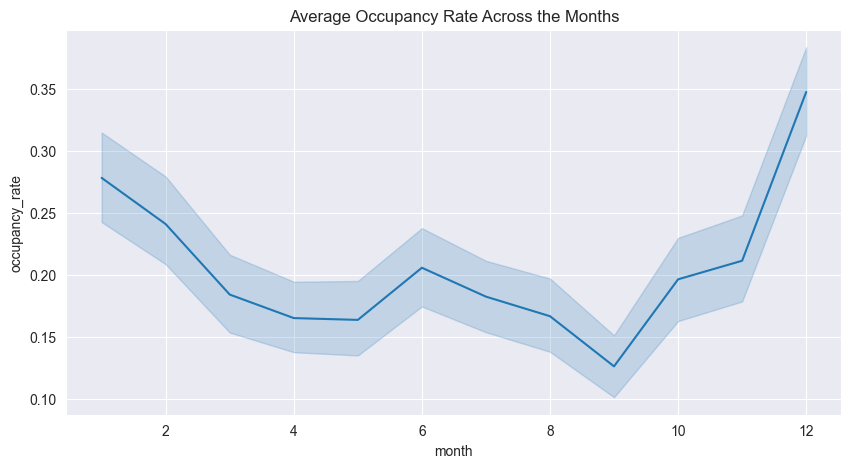

In [127]:
# calculate various aggregate statistics about occupancy rates across the months
agg_occupancy = df_calendar.groupby('month')['occupancy_rate'].agg(func=['mean','median','std']).sort_values(by='mean', ascending=False).round(3)
print(agg_occupancy)

# plot the average occupancy rate per month 
plt.figure(figsize=(10,5))
sns.lineplot(data=df_calendar, x='month', y= 'occupancy_rate')
plt.title("Average Occupancy Rate Across the Months")

Text(0.5, 1.0, 'Average Occupancy Rate Change per Month per Room_type')

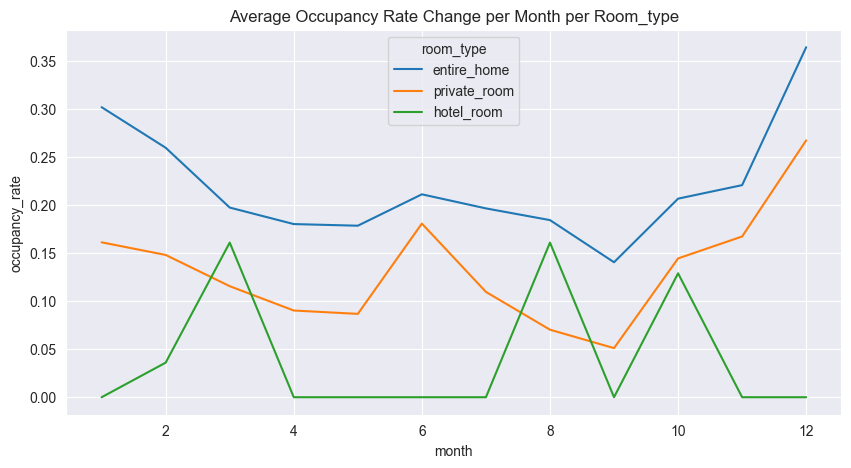

In [113]:
# How average occupancy rates change depending on the month and room type
plt.figure(figsize=(10,5))
sns.lineplot(data=df_calendar, x='month',hue='room_type', y= 'occupancy_rate',errorbar=None)
plt.title("Average Occupancy Rate Change per Month per Room_type")

- Average Occupancy rates peak during the December, with the lowest occupancy rates recorded during September 
- The period between November through to February has the highest average occupancany rates 
- Average occupancy rates have a downward trend from March to the lowest average rate in September with a slight rise during June 
- 

**Correlation Analysis**

In [128]:
# calculate the correlation between the features 
num_cols = [col for col in df_calendar.select_dtypes(exclude='object') if col not in ['listing_id', 'date']]
corr = df_calendar[num_cols].corr(method='spearman').round(3)
corr

,vacant_days,reserved_days,occupancy_rate,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,booked_rate_avg,rate_avg,revenue,month
vacant_days,1.000,-0.941,-0.942,-0.298,-0.566,-0.034,0.032,-0.001,-0.911,0.008
reserved_days,-0.941,1.000,1.000,0.304,0.572,0.044,-0.031,0.006,0.969,0.026
occupancy_rate,-0.942,1.000,1.000,0.303,0.571,0.044,-0.031,0.006,0.969,0.023
booking_lead_time_avg,-0.298,0.304,0.303,1.000,0.021,-0.007,0.232,0.225,0.380,-0.017
length_of_stay_avg,-0.566,0.572,0.571,0.021,1.000,0.206,-0.193,-0.197,0.360,0.062
min_nights_avg,-0.034,0.044,0.044,-0.007,0.206,1.000,-0.083,0.023,0.019,0.302
booked_rate_avg,0.032,-0.031,-0.031,0.232,-0.193,-0.083,1.000,0.997,0.513,0.012
rate_avg,-0.001,0.006,0.006,0.225,-0.197,0.023,0.997,1.000,0.167,0.015
revenue,-0.911,0.969,0.969,0.380,0.360,0.019,0.513,0.167,1.000,0.027
month,0.008,0.026,0.023,-0.017,0.062,0.302,0.012,0.015,0.027,1.000


**What is the relationship between average daily rates (rate_avg) and occupancy rates, and how does this vary by month?**

In [143]:
# investigating how booked_rate_avg affects occupancy rates 
corr_occupancy = corr['occupancy_rate'].to_frame().sort_values(by='occupancy_rate',ascending=False)
print(f'booked_rate_avg correlation with  {corr_occupancy.loc['booked_rate_avg', :]}')
print('====')
print(f'rate_avg correlation with {corr_occupancy.loc['rate_avg', :]}')

booked_rate_avg correlation with  occupancy_rate   -0.031
Name: booked_rate_avg, dtype: float64
====
rate_avg correlation with occupancy_rate    0.006
Name: rate_avg, dtype: float64


conclusion: There is very low negative and positive correlation between Occupancy_rate and both booked_rate_avg & rate_avg 

> How does booking lead time (booking_lead_time_avg) influence revenue, and are there seasonal differences?

<Axes: xlabel='month', ylabel='occupancy_rate'>

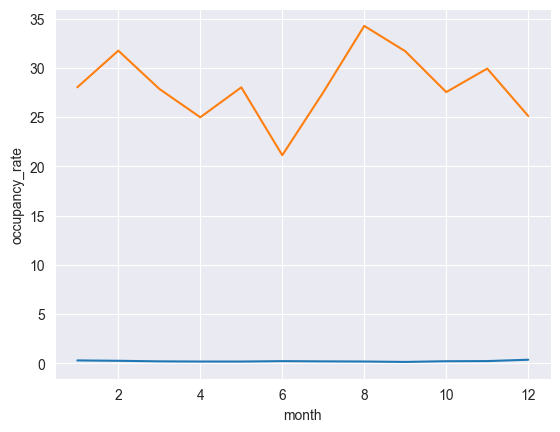

In [ ]:
# group occupancy and booking lead time per month to determine
compare = df_calendar.groupby('month')[['occupancy_rate','booking_lead_time_avg']].mean().sort_values(by='occupancy_rate', ascending=False)
compare

plt.figure(figsize=(10,5))
sns.lineplot(data=df_calendar, x='month', y= 'booking_lead_time_avg')
#plt.title("Average Occupancy Rate Change per Month per Room_type")

In [157]:
corr['booking_lead_time_avg'].sort_values(ascending=False)

booking_lead_time_avg    1.000
revenue                  0.380
reserved_days            0.304
occupancy_rate           0.303
booked_rate_avg          0.232
rate_avg                 0.225
length_of_stay_avg       0.021
min_nights_avg          -0.007
month                   -0.017
vacant_days             -0.298
Name: booking_lead_time_avg, dtype: float64

What is the impact of minimum night requirements (min_nights_avg) on occupancy and revenue?

In [158]:
corr['min_nights_avg'].sort_values(ascending=False)

min_nights_avg           1.000
month                    0.302
length_of_stay_avg       0.206
reserved_days            0.044
occupancy_rate           0.044
rate_avg                 0.023
revenue                  0.019
booking_lead_time_avg   -0.007
vacant_days             -0.034
booked_rate_avg         -0.083
Name: min_nights_avg, dtype: float64

**How does the length of stay (length_of_stay_avg) affect revenue and occupancy patterns across different listings?**

In [159]:
corr['min_nights_avg'].sort_values(ascending=False)

min_nights_avg           1.000
month                    0.302
length_of_stay_avg       0.206
reserved_days            0.044
occupancy_rate           0.044
rate_avg                 0.023
revenue                  0.019
booking_lead_time_avg   -0.007
vacant_days             -0.034
booked_rate_avg         -0.083
Name: min_nights_avg, dtype: float64

**How do vacant days (vacant_days) and reserved days (reserved_days) correlate with pricing and revenue?**

In [163]:
corr['revenue'].sort_values(ascending=False)


revenue                  1.000
reserved_days            0.969
occupancy_rate           0.969
booked_rate_avg          0.513
booking_lead_time_avg    0.380
length_of_stay_avg       0.360
rate_avg                 0.167
month                    0.027
min_nights_avg           0.019
vacant_days             -0.911
Name: revenue, dtype: float64

In [57]:
df_calendar.head()

,listing_id,date,vacant_days,reserved_days,occupancy_rate,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,rate_avg,revenue,month
0,36253079,2024-10-01,31,0,0.000,NaN,NaN,2.361576,4141.0,0.0,10
1,36253079,2024-11-01,30,0,0.000,NaN,NaN,2.361576,3973.0,0.0,11
2,36253079,2024-12-01,18,13,0.419,1.0,28.0,2.361576,4054.0,52839.0,12
3,36253079,2025-01-01,16,15,0.484,NaN,NaN,1.000000,4069.0,60968.0,1
4,36253079,2025-02-01,28,0,0.000,NaN,NaN,1.000000,3901.0,0.0,2


***